In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

xmin, xmax, xsteps = -4.0, 4.0, .25
ymin, ymax, ysteps = -4.0, 4.0, .25

x, y=np.meshgrid(np.arange(xmin, xmax+xsteps, xsteps),
                 np.arange(ymin, ymax+ysteps, ysteps))

f = lambda x, y: (x-2)**2 + (y-2)**2
z = f(x, y)
minima = np.array([2.,2.])
f(*minima)

0.0

[2. 2.]
[[2.]
 [2.]]


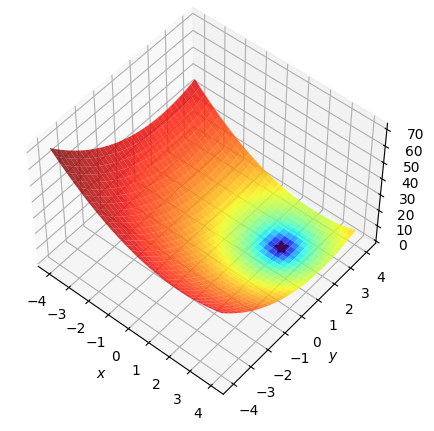

In [12]:
minima_ = minima.reshape(-1, 1)
print(minima)
print(minima_)
surf(f, x, y, minima=minima_)

/home/dagong/repo/intel01/class01/homework/kamdagong/hw4_ann/visualize.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


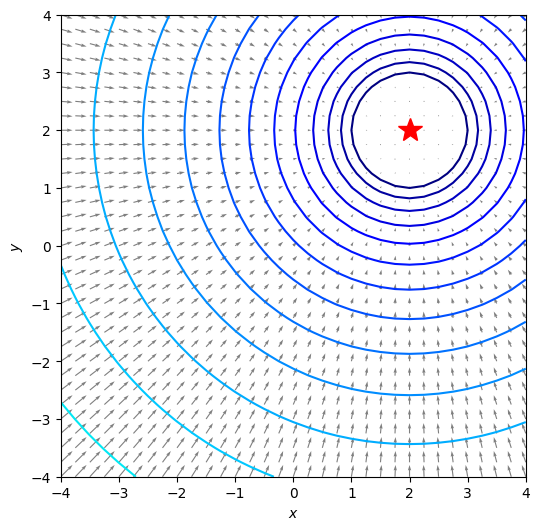

In [13]:
grad_f_x = lambda x, y: 2*(x-2)
grad_f_y = lambda x, y: 2*(y-2)

contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)

In [22]:
def steepest_descent_twod(func, gradx, grady, x0, Maxiter=10, learning_rate = 0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxiter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        x1 = x0 - learning_rate * grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)


0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


/home/dagong/repo/intel01/class01/homework/kamdagong/hw4_ann/visualize.py:41: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


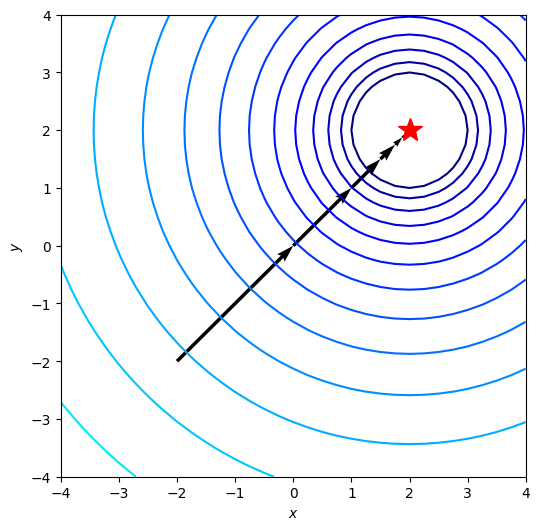

In [27]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f,x,y,paths,minima=np.array([[2],[2]]))